In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
import warnings
warnings.filterwarnings('ignore')
import sklearn

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('supply_test_over.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
X_regression = df.drop('historical_sales_volume', axis=1)
y_regression  = df['historical_sales_volume']
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target, = train_test_split(X_regression, y_regression,
                                               test_size = .2,
                                               random_state=101)

In [87]:
scoring = 'explained_variance'
models = []
models.append(('LRM    ', LinearRegression()))
models.append(('KNN    ', KNeighborsRegressor()))
models.append(('CART   ', DecisionTreeRegressor(random_state = 0)))
models.append(('ENet   ', ElasticNet()))
models.append(('SVR    ', SVR()))
models.append(('LLars  ', LassoLars()))
models.append(('Lasso  ', Lasso()))
models.append(('RFM    ', RandomForestRegressor(n_estimators=87)))
models.append(('Lars   ', Lars()))
models.append(('AdaB   ', AdaBoostRegressor()))
results = []
names = []
print('Scoring: Explained Variance')
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\nScoring: R2')
scoring = 'r2'
results2 = []
names2 = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scoring: Explained Variance
LRM      : 0.153121 (0.026302)
KNN      : 0.113815 (0.039570)
CART     : 0.153843 (0.077231)
ENet     : 0.133169 (0.020978)
SVR      : 0.000033 (0.000009)
LLars    : 0.153149 (0.026293)
Lasso    : 0.153121 (0.026302)
RFM      : 0.509070 (0.056837)
Lars     : 0.153121 (0.026302)
AdaB     : -0.265107 (0.227473)

Scoring: R2
LRM      : 0.152238 (0.026401)
KNN      : 0.111458 (0.038452)
CART     : 0.153129 (0.077912)
ENet     : 0.132330 (0.020937)
SVR      : -0.083723 (0.008115)
LLars    : 0.152266 (0.026391)
Lasso    : 0.152238 (0.026401)
RFM      : 0.505116 (0.058548)
Lars     : 0.152238 (0.026401)
AdaB     : -3.260778 (1.352299)


In [4]:
scoring = 'neg_mean_squared_error'
models = []
models.append(('LRM    ', LinearRegression()))
models.append(('KNN    ', KNeighborsRegressor()))
models.append(('CART   ', DecisionTreeRegressor(random_state = 0)))
models.append(('ENet   ', ElasticNet()))
models.append(('SVR    ', SVR()))
models.append(('LLars  ', LassoLars()))
models.append(('Lasso  ', Lasso()))
models.append(('RFM    ', RandomForestRegressor(n_estimators=87)))
models.append(('Lars   ', Lars()))
models.append(('AdaB   ', AdaBoostRegressor()))
results2 = []
names2 = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM      : -684831590707.612183 (135523683650.830719)
KNN      : -790890192497.362793 (143633455196.916321)
CART     : -774798657909.157593 (139582734632.129578)
ENet     : -776506742549.887451 (151357286312.388214)
SVR      : -982105134777.531494 (165571025570.629822)
LLars    : -684989360446.566406 (135461001385.424271)
Lasso    : -684831587383.446289 (135524026576.725601)
RFM      : -425614110989.207214 (99905556279.846207)
Lars     : -684986179592.233765 (135439502005.071991)
AdaB     : -2299656544846.568848 (673731739917.764526)


NameError: name 'results' is not defined

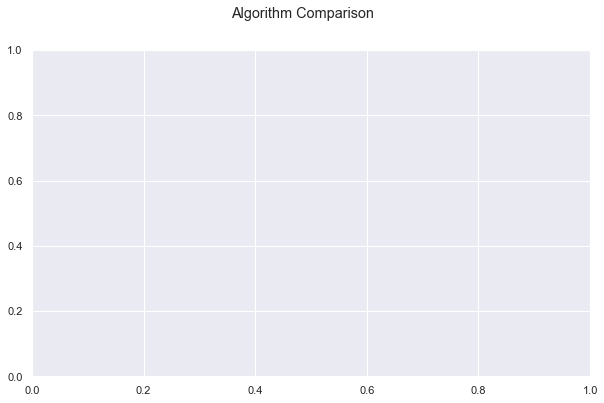

In [5]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

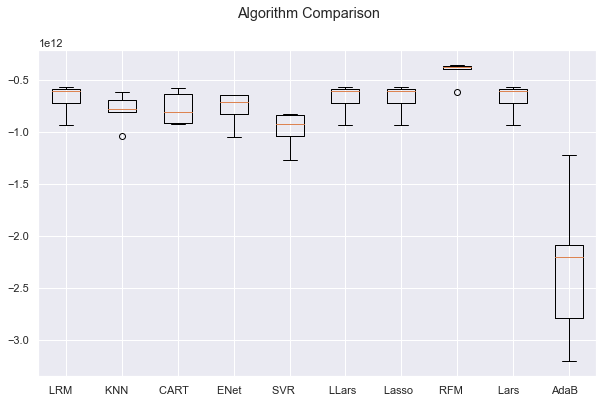

In [6]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [90]:
import statsmodels.api as sm

In [91]:
STAT_Model = sm.OLS(training_target, training_features)

In [92]:
results = STAT_Model.fit()

In [93]:
print(results.summary2())

                                  Results: Ordinary least squares
Model:                       OLS                        Adj. R-squared (uncentered):    0.421      
Dependent Variable:          historical_sales_volume    AIC:                            569505.5937
Date:                        2020-07-24 16:54           BIC:                            569615.4127
No. Observations:            18849                      Log-Likelihood:                 -2.8474e+05
Df Model:                    14                         F-statistic:                    979.1      
Df Residuals:                18835                      Prob (F-statistic):             0.00       
R-squared (uncentered):      0.421                      Scale:                          7.7450e+11 
---------------------------------------------------------------------------------------------------
                                     Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
----------------------------------

In [94]:
STAT_Predictions =STAT_Model.predict(results.params, exog = test_features)

In [95]:
def rmse(y_test, preds):
    return np.sqrt(np.mean((y_test - preds)**2))

In [96]:
rmse(test_target, STAT_Predictions)

825095.8771545375

In [9]:
X = df.drop('historical_sales_volume', axis = 1)
y = df.historical_sales_volume

from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [10]:
RFM = RandomForestRegressor(n_estimators = 87)
RFM.fit(training_features, training_target)

RandomForestRegressor(n_estimators=87)

In [17]:
pred = RFM.predict(test_features)

In [19]:
test_features['E_Profit']= .22* test_features['prob_sale'] * pred - 8.40 * test_features['prob_sale'] - 45.65

Text(0.5, 0, 'log(Estimated Profit)')

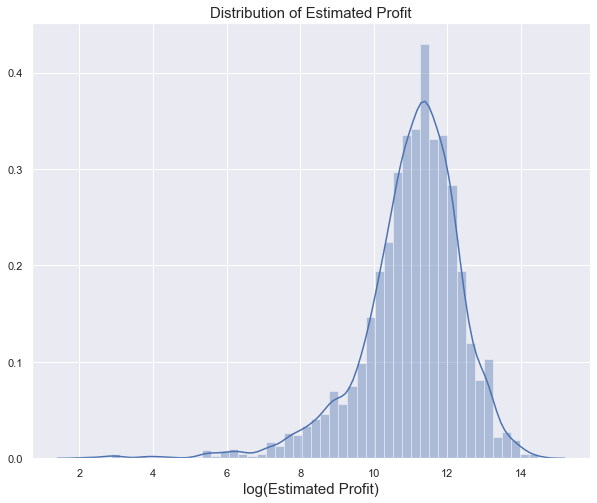

In [21]:
plt.figure(figsize = (10, 8))
plt.title('Distribution of Estimated Profit', fontsize = 15)
sns.distplot(np.log(test_features['E_Profit']))
plt.xlabel('log(Estimated Profit)', size=15)

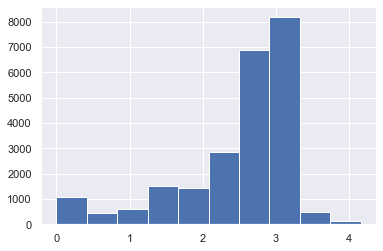

In [237]:
np.log(X['number_of_prior_year_transactions']).hist()

In [238]:
y

0        2.301936e+05
1        1.512525e+05
2        1.377761e+06
3        2.214571e+05
4        3.329353e+05
             ...     
23577    2.037653e+05
23578    6.461700e+05
23579    6.515890e+05
23580    1.276877e+06
23581    3.140800e+05
Name: historical_sales_volume, Length: 23582, dtype: float64

In [239]:
X['Regression_preds']

0        2.511521e+05
1        2.186041e+05
2        5.509961e+05
3        2.308521e+05
4        5.960897e+05
             ...     
23577    2.136626e+05
23578    6.430655e+05
23579    6.370733e+05
23580    1.389299e+06
23581    3.253774e+05
Name: Regression_preds, Length: 23582, dtype: float64

In [14]:
X['Regression_preds'].describe()

count    2.358200e+04
mean     6.589912e+05
std      7.983048e+05
min      1.319314e+03
25%      2.345768e+05
50%      4.272954e+05
75%      7.716036e+05
max      1.632316e+07
Name: Regression_preds, dtype: float64

In [247]:
from sklearn import metrics
predictions = RFM.predict(test_features)

print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_target, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, predictions)))
print('R2 Score: ', metrics.r2_score(test_target, predictions) )

Mean Absolute Error: 278642.8542359913
Mean Squared Error: 562678552129.5642
Root Mean Squared Error: 750119.0253083601
R2 Score:  0.46038225311932357


In [242]:
X

,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases,campaign_period_sales_positive,prob_sale,Regression_preds,E_Profit
0,17.0,0,0,1,1,0,0,1,1,13571,1,0,0.0000,2.511521e+05,-45.650000
1,6.0,0,0,1,1,0,1,0,1,12308,0,0,0.0000,2.186041e+05,-45.650000
2,21.0,0,0,1,1,0,1,0,0,12748,1,0,0.0000,5.509961e+05,-45.650000
3,15.0,0,0,1,1,0,0,1,1,13388,1,0,0.6455,2.308521e+05,32732.231654
4,22.0,0,0,0,1,0,0,0,1,11927,2,0,0.0000,5.960897e+05,-45.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23577,4.0,0,0,1,1,0,0,0,0,9782,4,1,1.0000,2.136626e+05,46951.716133
23578,6.0,0,0,1,1,1,0,0,1,10390,2,1,1.0000,6.430655e+05,141420.368800
23579,18.0,0,0,1,1,0,0,1,1,12522,1,1,1.0000,6.370733e+05,140102.075371
23580,9.0,1,1,0,1,0,0,0,0,5614,1,1,1.0000,1.389299e+06,305591.702940


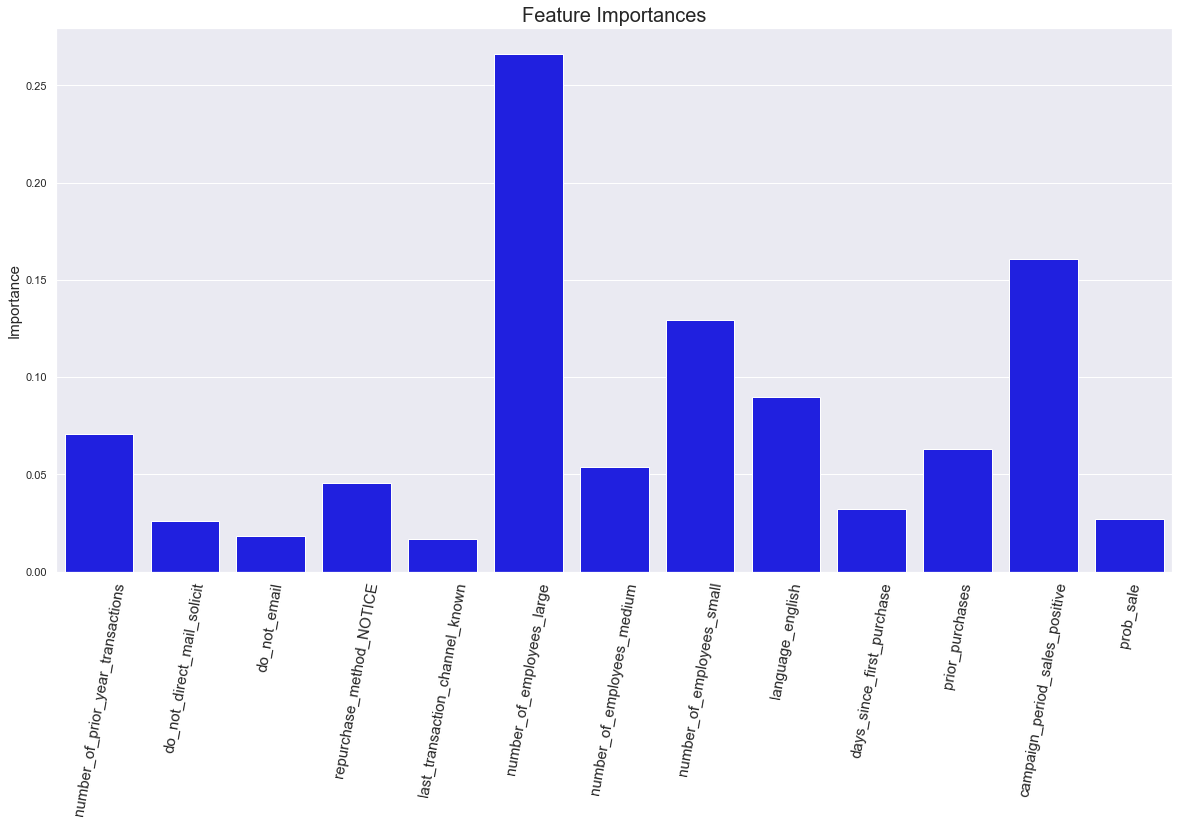

,Importance Coef,Features
5,0.266261,number_of_employees_large
11,0.160978,campaign_period_sales_positive
7,0.129406,number_of_employees_small
8,0.089996,language_english
0,0.070893,number_of_prior_year_transactions
10,0.062922,prior_purchases
6,0.053839,number_of_employees_medium
3,0.045791,repurchase_method_NOTICE
9,0.031987,days_since_first_purchase
12,0.027188,prob_sale


In [26]:
from xgboost import XGBRegressor

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBRegressor()
model.fit(training_features, training_target)
sns.barplot(x = training_features.columns, y = model.feature_importances_, color='blue')
plt.xticks(rotation = 80, fontsize = 15)
plt.title('Feature Importances', fontsize = 20)
plt.ylabel('Importance', fontsize=15)
plt.show()

feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

In [111]:
RFM.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Text(0.5, 0, 'log(Estimated Profit)')

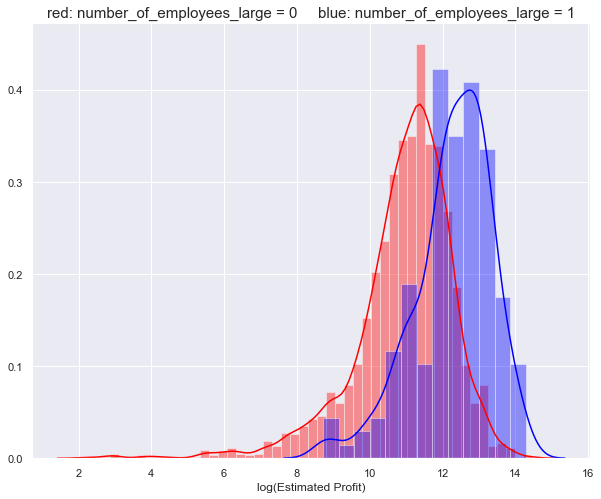

In [22]:
plt.figure(figsize = (10, 8))
plt.title('red: number_of_employees_large = 0     blue: number_of_employees_large = 1', fontsize = 15)
sns.distplot(np.log(test_features['E_Profit'][test_features['number_of_employees_large'] == 0]), color = 'red')
sns.distplot(np.log(test_features['E_Profit'][test_features['number_of_employees_large'] == 1]), color = 'blue')
plt.xlabel('log(Estimated Profit)')

Text(0.5, 0, 'log(Estimated Profit)')

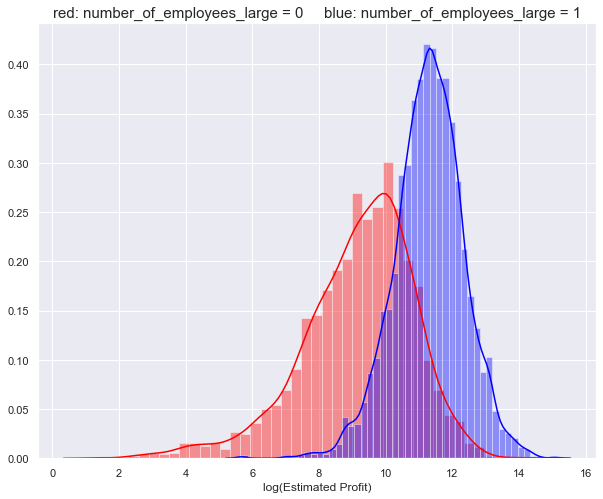

In [245]:
plt.figure(figsize = (10, 8))
plt.title('red: number_of_employees_large = 0     blue: number_of_employees_large = 1', fontsize = 15)
sns.distplot(np.log(X['E_Profit'][X['campaign_period_sales_positive'] == 0]), color = 'red')
sns.distplot(np.log(X['E_Profit'][X['campaign_period_sales_positive'] == 1]), color = 'blue')
plt.xlabel('log(Estimated Profit)')

Text(0.5, 0, 'log(Estimated Profit)')

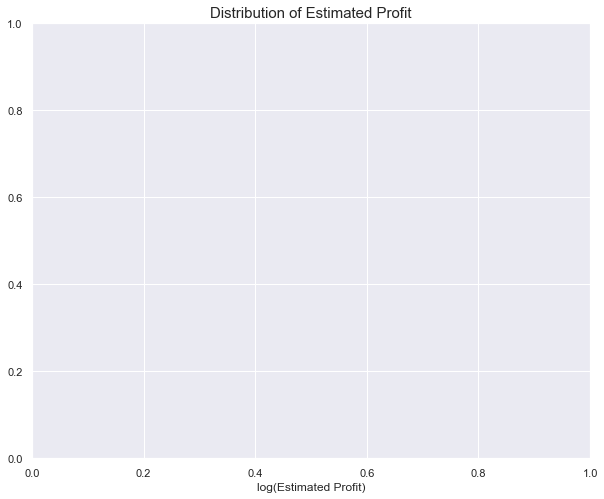

In [259]:
plt.figure(figsize = (10, 8))
plt.title('Distribution of Estimated Profit', fontsize = 15)
plt.xlabel('log(Estimated Profit)')

In [246]:
X['E_Profit'].describe()

count    2.358200e+04
mean     7.043712e+04
std      1.467832e+05
min     -4.565000e+01
25%     -4.565000e+01
50%      1.857690e+04
75%      8.478048e+04
max      3.560632e+06
Name: E_Profit, dtype: float64

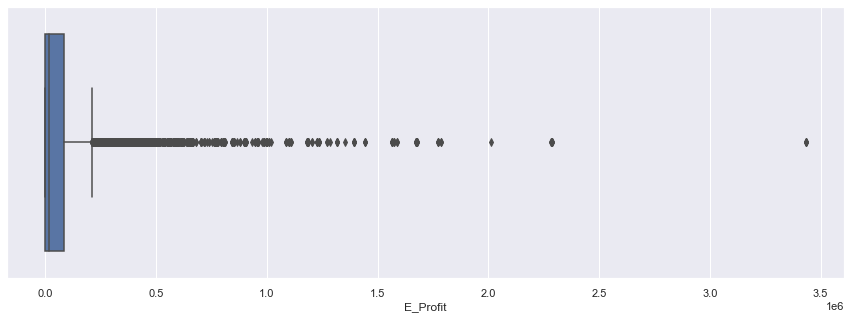

In [226]:
plt.figure(figsize=(15, 5))
sns.boxplot(X['E_Profit'])